In [22]:
# Created Nov 30, 2021, by GO
# Last updated Nov 30 by GO

#from matplotlib import animation
#import numpy as np
#from mpl_toolkits.basemap import Basemap
#from netCDF4 import Dataset


In [15]:
%pip install geos --upgrade

Requirement already up-to-date: geos in c:\programdata\anaconda3\lib\site-packages (0.2.3)
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install Proj --upgrade

Requirement already up-to-date: Proj in c:\programdata\anaconda3\lib\site-packages (0.2.0)
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install cartopy --upgrade --upgrade-strategy=only-if-needed

  Using cached https://files.pythonhosted.org/packages/fc/59/aa52698e3838f4cd0e7eaa75bd86837e9e0b05041dbdaee3cda2fffced06/Cartopy-0.20.1.tar.gz
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' 'C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\Greig\AppData\Local\Temp\tmpy4xe3qr1'
       cwd: C:\Users\Greig\AppData\Local\Temp\pip-install-2toyj2_z\cartopy
  Complete output (3 lines):
  setup.py:120: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
    '.'.join(str(v) for v in GEOS_MIN_VERSION), ))
  Proj version 5.2.0 is installed, but cartopy requires at least version 8.0.0.
  ----------------------------------------
ERROR: Command errored out with exit status 1: 'C:\ProgramData\Anaconda3\python.exe' 'C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\Greig\AppData\Local\Temp\tmpy4xe3qr1' Check the logs for full command output.


In [11]:
#%pip show
%pip list

Package                            Version     Location                                                          
---------------------------------- ----------- ------------------------------------------------------------------
affine                             2.3.0       
aiohttp                            3.7.2       
alabaster                          0.7.12      
altair                             3.2.0       
anaconda-client                    1.7.2       
anaconda-navigator                 1.9.12      
anaconda-project                   0.8.3       
angles                             2.0         
appdirs                            1.4.4       
arrow                              0.17.0      
asgiref                            3.2.10      
asn1crypto                         1.0.1       
astroid                            2.3.1       
astropy                            3.2.1       
async-timeout                      3.0.1       
atomicwrites                       1.3.0       
attr

In [1]:
#http://tech.weatherforce.org/blog/ecmwf-data-animation/index.html
#code requires Cartoppy 0.18 and above
#              GEOS v >8 required

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import matplotlib.animation as animation

def make_figure():
    fig = plt.figure(figsize=(8, 3))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # generate a basemap with country borders, oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax

make_figure();

C:\ProgramData\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


In [2]:
ds = xr.open_mfdataset("..//data//temp//SalishSea1500-RUN201_MonthlyMeans_grid_T_2D_1981.nc")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\xarray\backends\api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [3]:
ds

<xarray.Dataset>
Dimensions:            (bnds: 2, nvertex: 4, time_counter: 13, x: 132, y: 299)
Coordinates:
  * time_counter       (time_counter) datetime64[ns] 1981-01-16T12:00:00 ... 1982-01-01
    nav_lon            (y, x) float32 dask.array<chunksize=(299, 132), meta=np.ndarray>
    nav_lat            (y, x) float32 dask.array<chunksize=(299, 132), meta=np.ndarray>
Dimensions without coordinates: bnds, nvertex, x, y
Data variables:
    time_counter_bnds  (time_counter, bnds) datetime64[ns] dask.array<chunksize=(13, 2), meta=np.ndarray>
    nav_lon_bnds       (y, x, nvertex) float32 dask.array<chunksize=(299, 132, 4), meta=np.ndarray>
    nav_lat_bnds       (y, x, nvertex) float32 dask.array<chunksize=(299, 132, 4), meta=np.ndarray>
    cell_area          (y, x) float32 dask.array<chunksize=(299, 132), meta=np.ndarray>
    sossheig           (time_counter, y, x) float32 dask.array<chunksize=(13, 299, 132), meta=np.ndarray>
    sossheig_ib        (time_counter, y, x) float32 dask.array<chunksize=(13, 299, 132), meta=np.ndarray>
    mldkz5             (time_counter, y, x) float32 dask.array<chunksize=(13, 299, 132), meta=np.ndarray>
    mldr10_1           (time_counter, y, x) float32 dask.array<chunksize=(13, 299, 132), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Oct 06 18:27:04 2021: cdo monmean /project/6006412/gold...
    name:         SalishSea1500-RUN201_1h_grid_T_2D
    description:  ocean T 2D grid variables
    title:        ocean T 2D grid variables
    timeStamp:    2021-Oct-02 08:13:36 GMT
    uuid:         5a3eaf4d-42e7-4a19-b10d-2f975b346706
    NCO:          netCDF Operators version 4.9.5 (Homepage = http://nco.sf.ne...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [9]:
ds.time_counter

<xarray.DataArray 'time_counter' (time_counter: 13)>
array(['1981-01-16T12:00:00.000000000', '1981-02-14T23:30:00.000000000',
       '1981-03-16T11:30:00.000000000', '1981-04-15T23:30:00.000000000',
       '1981-05-16T11:30:00.000000000', '1981-06-15T23:30:00.000000000',
       '1981-07-16T11:30:00.000000000', '1981-08-16T11:30:00.000000000',
       '1981-09-15T23:30:00.000000000', '1981-10-16T11:30:00.000000000',
       '1981-11-15T23:30:00.000000000', '1981-12-16T11:30:00.000000000',
       '1982-01-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1981-01-16T12:00:00 ... 1982-01-01
Attributes:
    standard_name:  time
    long_name:      Time axis
    bounds:         time_counter_bnds
    axis:           T

TypeError: _pcolorargs() got an unexpected keyword argument 'allmatch'

C:\ProgramData\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


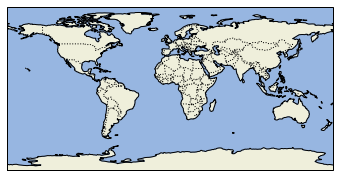

In [15]:
area = ds.mldkz5
_, ax = make_figure()

#grid = area.sel(time_counter='2017-01-01T12:00:00')
grid = area.sel(time_counter='1981-02-14T23:30:00')
grid.plot(ax=ax, transform=ccrs.PlateCarree());

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002028582F0D8> (for post_execute):


C:\ProgramData\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


TypeError: _pcolorargs() got an unexpected keyword argument 'allmatch'

C:\ProgramData\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


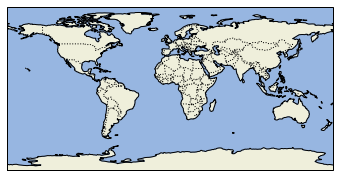

In [21]:

fig, ax = make_figure()

frames = area.time_counter.size        # Number of frames
min_value = area.values.min()  # Lowest value
max_value = area.values.max()  # Highest value


def draw(frame, add_colorbar):
    grid = area[frame]
    contour = grid.plot(ax=ax, transform=ccrs.PlateCarree(),
                        add_colorbar=add_colorbar, vmin=min_value, vmax=max_value)
    title = u"%s — %s" % (ds.mldkz5.long_name, str(area.time_counter[frame].values)[:19])
    ax.set_title(title)
    return contour


def init():
    return draw(0, add_colorbar=True)


def animate(frame):
    return draw(frame, add_colorbar=False)


ani = animation.FuncAnimation(fig, animate, frames, interval=0.01, blit=False,
                              init_func=init, repeat=False)
#ani.save('mldkz5_test1.mp4', writer=animation.FFMpegWriter(fps=8))
ani
#plt.close(fig)

In [63]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats

Text(0.5, 1.0, 'Turbulent mixing layer depth (Kz = 5e-4)2051-04-15')

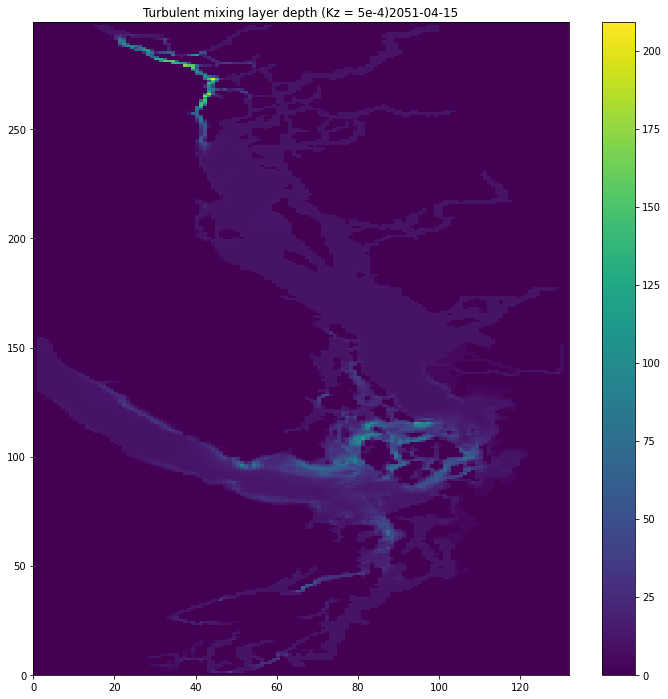

In [104]:
month = 3
nc_file = "..//data//temp//SalishSea1500-RUN201_MonthlyMeans_grid_T_2D_1981.nc"
with nc.Dataset(nc_file) as ncf:
    nlat = ncf.variables['nav_lon'][month,...]   # neglected the 1/2 grid box shift here
    nlon = ncf.variables['nav_lat'][month,...]
    mldkz5 = ncf.variables['mldkz5'][month,...] # turbocline depth
    mldr10_1 = ncf.variables['mldr10_1'][month,...] # mixed layer depth
    tc = ncf.variables['time_counter'][month,...]

cm = 5

plt.close(); 
plt.figure(figsize=(12,12))
plt.subplot(1,1,1)
plt.pcolormesh(mldkz5)
#plt.pcolormesh(ma_temper,shading='auto')
#plt.plot(ncst[:,0],ncst[:,1],'k',linewidth=0.5)
#plt.xlim([-126,-122]); plt.ylim([47,51])
#plt.clim([0,cm]); 
plt.colorbar()
plt.title('Turbulent mixing layer depth (Kz = 5e-4)' + str(dt.date.fromtimestamp(tc))) 
#plt.title('Mixed layer depth (based on density; sigma-theta)  ' + str(dt.date.fromtimestamp(tc))) 


AttributeError: 'MaskedArray' object has no attribute 'units'

In [27]:
tc

masked_array(data=2.5574832e+09,
             mask=False,
       fill_value=1e+20)

In [74]:
mldkz5[:,:]

masked_array(
  data=[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)